# To run this Code you will need to store the zip file containing the image data on your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Change the Below Path as Needed , Currently the Zip file is in a Folder called "Colab Notebooks" inside google drive

In [2]:
# check to make sure your data is at the correct location
!ls /content/gdrive/'My Drive'/'Colab Notebooks'/

Assignment2.ipynb  earth_data.zip		TinyImageNet.zip
Assignment.ipynb   Tiny_ImageNet_Example.ipynb	week_8_9.ipynb


### UnZip Your Data File

In [3]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/earth_data.zip" -d "/content/"

Archive:  /content/gdrive/My Drive/Colab Notebooks/earth_data.zip
  inflating: /content/earth_data.h5  


### Check the Contents of the Location to make sure your File has been Unzipped

In [4]:
!ls /content/

earth_data.h5  gdrive  sample_data


# Loading And Normalization

In [3]:
import numpy as np
import h5py

def loadDataH5():
  with h5py.File('earth_data.h5','r') as hf:
    trainX = np.array(hf.get('trainX'))
    trainY = np.array(hf.get('trainY'))
    valX = np.array(hf.get('valX'))
    valY = np.array(hf.get('valY'))

  return trainX, trainY, valX, valY

trainX, trainY, valX, valY = loadDataH5()

# normalize
trainX = trainX.astype('float32')/255.0
valX = valX.astype('float32')/255.0

print(f"Shape of Training Data: {trainX.shape}")
print(f"Shape of Validation Data: {valX.shape}")
print(f"Number of Instances of Training Data: {trainX.shape[0]}")
print(f"Number of Instances of Validation Data: {valX.shape[0]}")
# input shape
shape_input = trainX.shape[1:]
print(f"Shape of Input Data Shape: {shape_input}")

no_of_classes = len(np.unique(trainY))
print(f"Number of Classes: {no_of_classes}")

Shape of Training Data: (19200, 64, 64, 3)
Shape of Validation Data: (4800, 64, 64, 3)
Number of Instances of Training Data: 19200
Number of Instances of Validation Data: 4800
Shape of Input Data Shape: (64, 64, 3)
Number of Classes: 9


# Part 1: Import CNN Model and Use it for Feature Extraction

### Create CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50

# Define the Models and Take only Top Layers to act as Feature extractor
VGG16_Model = VGG16(include_top=False,weights="imagenet",input_shape= shape_input,classes=no_of_classes)

ResNet50_Model = ResNet50(include_top=False,weights="imagenet",input_shape= shape_input,classes=no_of_classes)

initialModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=shape_input)
VGG16_Model_Layer4 = tf.keras.Model(inputs=initialModel.input, outputs=initialModel.get_layer('block4_conv3').output)


### Feature Extraction

In [5]:
# Define a Function that retuns training and validation features based on model
def feature_extract(model_type):
  featuresTrain = model_type.predict(trainX)
  featuresTrain = featuresTrain.reshape(featuresTrain.shape[0], -1)
  featuresVal = model_type.predict(valX)
  featuresVal = featuresVal.reshape(featuresVal.shape[0], -1)
  return featuresTrain, featuresVal


### Import Machine Learning Algorithmn for Training and Validation


In [6]:
# ML Modles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Functions 
from sklearn.metrics import accuracy_score

classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Nearest Neighbours": KNeighborsClassifier()
}
 

## VGG16_All_Top_layers

In [10]:
# VGG16_All_Top_layers
featuresTrain , featuresVal = feature_extract(model_type = VGG16_Model )  
print(f"Training Data Shape After Feature Extraction Using VGG16_All_Top_layers: {featuresTrain.shape}")
print(f"Validation Data Shape After Feature Extraction Using VGG16_All_Top_layers: {featuresVal.shape}")
for name_ , func in classifiers.items():  
  func.fit(featuresTrain , trainY)
  y_prediction = func.predict(featuresVal)  
  print(f"Classifier: {name_}, Accuracy_score: {accuracy_score(valY, y_prediction):.3f}")


150/150 [==============================] - 2s 12ms/step
Training Data Shape After Feature Extraction Using VGG16_All_Top_layers: (19200, 2048)
Validation Data Shape After Feature Extraction Using VGG16_All_Top_layers: (4800, 2048)
Classifier: Random Forest, Accuracy_score: 0.817
Classifier: Nearest Neighbours, Accuracy_score: 0.777


## ResNet50_Model_All_Top_layers

In [11]:
# ResNet50_All_Top_layers
featuresTrain , featuresVal = feature_extract(model_type = ResNet50_Model )  
print(f"Training Data Shape After Feature Extraction Using ResNet50_All_Top_layers: {featuresTrain.shape}")
print(f"Validation Data Shape After Feature Extraction Using ResNet50_All_Top_layers: {featuresVal.shape}")
for name_ , func in classifiers.items():  
  func.fit(featuresTrain , trainY)
  y_prediction = func.predict(featuresVal)  
  print(f"Classifier: {name_}, Accuracy_score: {accuracy_score(valY, y_prediction):.3f}")


150/150 [==============================] - 2s 11ms/step
Training Data Shape After Feature Extraction Using ResNet50_Model_All_Top_layers: (19200, 8192)
Validation Data Shape After Feature Extraction Using ResNet50_Model_All_Top_layers: (4800, 8192)
Classifier: Random Forest, Accuracy_score: 0.591
Classifier: Nearest Neighbours, Accuracy_score: 0.542


## VGG16_Remove_layer_5

In [7]:
# VGG16_Remove_layer_5
featuresTrain , featuresVal = feature_extract(model_type = VGG16_Model_Layer4 )  
print(f"Training Data Shape After Feature Extraction Using VGG16_Remove_layer_5: {featuresTrain.shape}")
print(f"Validation Data Shape After Feature Extraction Using VGG16_Remove_layer_5: {featuresVal.shape}")
for name_ , func in classifiers.items():  
  func.fit(featuresTrain , trainY)
  y_prediction = func.predict(featuresVal)  
  print(f"Classifier: {name_}, Accuracy_score: {accuracy_score(valY, y_prediction):.3f}")


150/150 [==============================] - 1s 10ms/step
Training Data Shape After Feature Extraction Using VGG16_Remove_layer_5: (19200, 32768)
Validation Data Shape After Feature Extraction Using VGG16_Remove_layer_5: (4800, 32768)
Classifier: Random Forest, Accuracy_score: 0.831
Classifier: Nearest Neighbours, Accuracy_score: 0.620


# Part 2 : Fine Tuning as a Methord of Transfer Learning

### Introduce data augmentation with ImageDataGenerator

In [ ]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
  shear_range=0.2,
  zoom_range=0.2,
  rotation_range=30,
  horizontal_flip=True)

train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)

### Plot Accuracy and Loss 


In [ ]:
import matplotlib.pyplot as plt

def plot_results(H, NUM_EPOCHS):
    
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

## Initialize 

In [ ]:
NUM_EPOCHS = 50
batchSize = 32

## Model 1

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

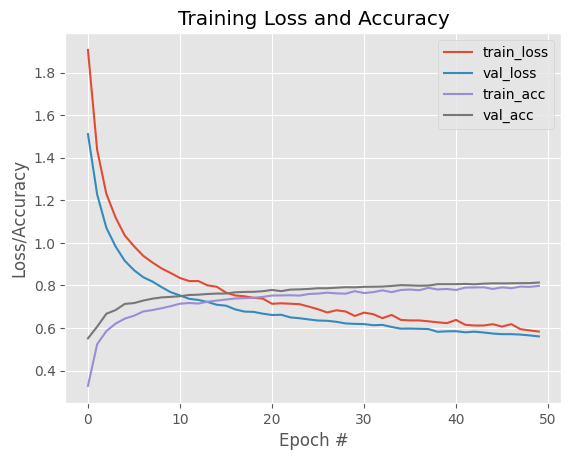

In [ ]:
# set base model as non trainable
VGG16_Model.trainable = False

#initialize the model
model = tf.keras.models.Sequential()
model.add(VGG16_Model)

# include full connected layers which are trainable
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))  
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(no_of_classes, activation='softmax'))

# Check Model 
print(VGG16_Model.summary())
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), metrics=['accuracy'])

# save checkpoints
name= "checkpointed_model1_Task2.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(name, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

# save history
H = model.fit(train_generator,epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(valX, valY), callbacks=[checkpoint])

# plot results 
plot_results(H, NUM_EPOCHS)


## Model 2

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

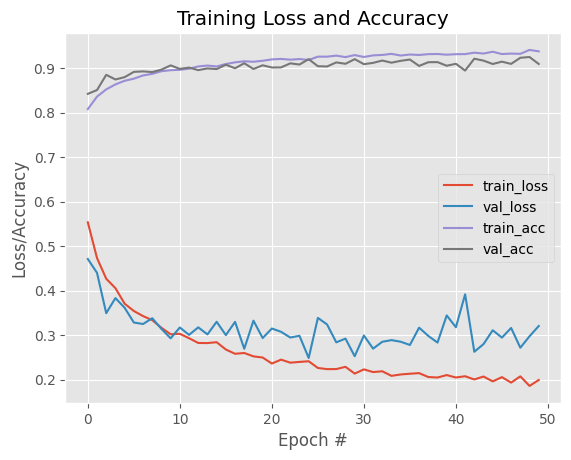

In [ ]:
# initialize the model
model2 = tf.keras.models.Sequential()
model2.add(VGG16_Model)

# include full connected with single relu layers
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))  
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(no_of_classes, activation='softmax'))

# enable trainable layer
VGG16_Model.trainable = True
trainableFlag = False
for layer in VGG16_Model.layers:
  if layer.name == 'block5_conv1':
    trainableFlag = True
  layer.trainable = trainableFlag

# check model
print(VGG16_Model.summary())
print(model2.summary())

# save checkpoints
name= "checkpointed_model2_Task2.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(name, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

# really small learning rate when model is trainable
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

# save history
print ("\nFine Tune Fully Connected Layer and Selected Convolutional Layers \n")
H = model.fit(train_generator,epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(valX, valY), callbacks=[checkpoint])

#plot results
plot_results(H, NUM_EPOCHS)


## Model 3

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

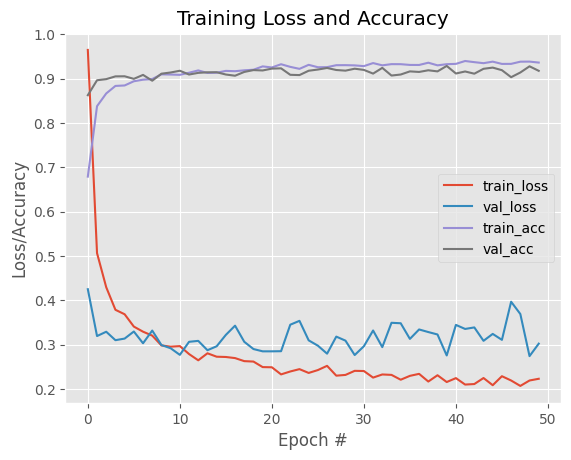

In [ ]:
# Model 3
model3 = tf.keras.models.Sequential()
model3.add(VGG16_Model)

# include full connected with 2 relu layers 
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(256, activation='relu'))  
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Dense(128, activation='relu'))  
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Dense(no_of_classes, activation='softmax'))

# enable trainable layer
VGG16_Model.trainable = True
trainableFlag = False
for layer in VGG16_Model.layers:
  if layer.name == 'block5_conv1':
    trainableFlag = True
  layer.trainable = trainableFlag

# check model
print(VGG16_Model.summary())
print(model3.summary())

# save checkpoints
name= "checkpointed_model3_Task2.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(name, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

# really small learning rate when model is trainable
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

# save history
print ("\n Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
H = model3.fit(train_generator,epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(valX, valY), callbacks=[checkpoint])

#plot results
plot_results(H, NUM_EPOCHS)


# Part 3 : Build a Basic Neural Network CNN Ensemble

In [ ]:
# Make predictions on validation set
pred = model.predict(valX)
pred1 = model2.predict(valX)
pred2 = model3.predict(valX)

# Combine predictions through majority voting
final_preds = np.argmax(np.sum([pred ,pred1, pred2], axis=0), axis=1)

# Evaluate final predictions
accuracy = np.mean(final_preds == valY)
print(f'Ensemble Accuracy: {accuracy:.3f}' )


150/150 [==============================] - 2s 14ms/step
Ensemble Accuracy: 0.905
